## 5.9 Regression Practice - Bike Sharing Demand
- Data clensing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('Bike_sharing/bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# string to datetime
bike_df['datetime']=bike_df['datetime'].apply(pd.to_datetime)
# year, month, day, hour extraction
bike_df['year'] = bike_df['datetime'].apply(lambda x:x.year)
bike_df['month'] = bike_df['datetime'].apply(lambda x:x.month)
bike_df['day']  = bike_df['datetime'].apply(lambda x:x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [7]:
# casual+registered = count -> drop casual and registered column.
drop_columns = ['datetime', 'casual', 'registered']
bike_df = bike_df.drop(drop_columns, axis=1)
bike_df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [10]:
# Function for RMSLE MES, RMSE evaluation 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmsle_bulit_in(y, pred):
    return np.sqrt(mean_squared_log_error(y, pred)) # it's easy to get overflow/underflow error

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmsle_built_in_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # add mean_absolute_error
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE:{0:.3f}, RMSLE_builtin:{1:.3f}, RMSE:{2:.3f}, MAE:{3:.3f}'.format(rmsle_val,
                                                    rmsle_built_in_val, rmse_val, mae_val))    

## applying log, feature encoding, model training, prediction, evaluation

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop('count', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE:1.165, RMSLE_builtin:1.165, RMSE:140.900, MAE:105.924


<ipython-input-10-4fb8e5cf062e>:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [51]:
# check the top 5 most significant error got from simple linear regression
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values(by='diff', ascending = False).iloc[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

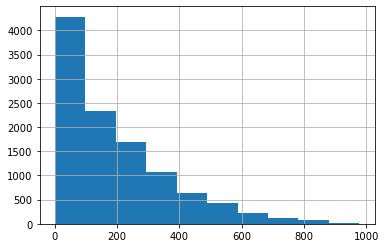

In [52]:
y_target.hist()

* in order to change this target distribution to standard distribution shape, use log1p
* then, later, use expm1() to go back to original scale

<AxesSubplot:>

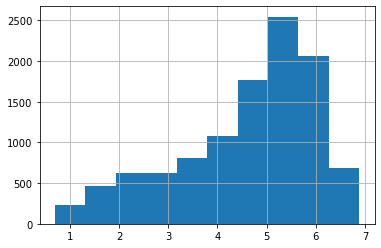

In [53]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [54]:
# target column transform
y_target_log = np.log1p(y_target)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.017, RMSLE_builtin:1.017, RMSE:162.594, MAE:109.286


<AxesSubplot:>

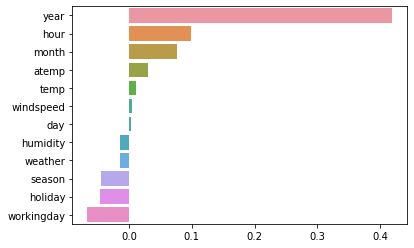

In [58]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort, y=coef_sort.index) 
# large number (ex: year) affects the prediction performance of the regression->one hot encoding

In [60]:
X_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [64]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 
                                    'holiday', 'workingday', 'season', 'weather'])

In [66]:
X_train, X_test, y_train, t_test = train_test_split(X_features_ohe, y_target_log, 
                                                    test_size=0.3, random_state=0)
# model, train, test data -> evaluate results
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE:0.590, RMSLE_builtin:0.590, RMSE:97.688, MAE:63.382
### Ridge ###
RMSLE:0.590, RMSLE_builtin:0.590, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSLE_builtin:0.635, RMSE:113.219, MAE:72.803


<AxesSubplot:>

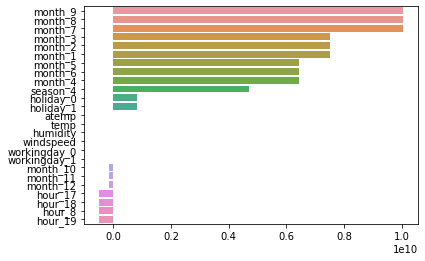

In [76]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_top_sort = coef.sort_values(ascending=False)[:25]
coef_bot_sort = coef.sort_values(ascending=True)[:25]
sns.barplot(x=coef_top_sort, y=coef_top_sort.index)

<AxesSubplot:>

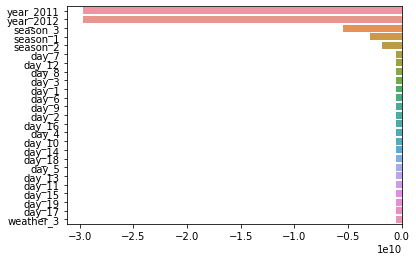

In [77]:
sns.barplot(x=coef_bot_sort, y=coef_bot_sort.index)

- Tree-based regression

In [83]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# randomforest, GBM, XGBoost, Lightgbm 
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

# get_model_predict(xgb_reg, X_train, X_test, y_train, y_test, is_expm1=True) 
# Depending on version, dataframe type might induce error in case of xgboost
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True) 

### RandomForestRegressor ###
RMSLE:0.354, RMSLE_builtin:0.354, RMSE:50.414, MAE:31.142
### GradientBoostingRegressor ###
RMSLE:0.330, RMSLE_builtin:0.330, RMSE:53.327, MAE:32.737
### XGBRegressor ###
RMSLE:0.342, RMSLE_builtin:0.342, RMSE:51.732, MAE:31.251
### LGBMRegressor ###
RMSLE:0.319, RMSLE_builtin:0.319, RMSE:47.215, MAE:29.029
